# Multiple Linear Regression with the Boston House Prices Dataset

The Boston House Prices dataset contains the median house price in suburbs and towns in Boston, as well as statistics such as per capita crime rate, numbers of rooms per dwelling and distance to major employment centres.

This project will use multiple linear regression to model how these attributes predict the median house price.

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preparing the data

Loading the dataset:

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [20]:
print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Setting up a dataframe of features:

In [10]:
boston_df = pd.DataFrame(data = boston['data'], columns=boston['feature_names'])

In [11]:
boston_df['Price'] = boston['target']

In [12]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Exploratory data analysis:

In [13]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [14]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


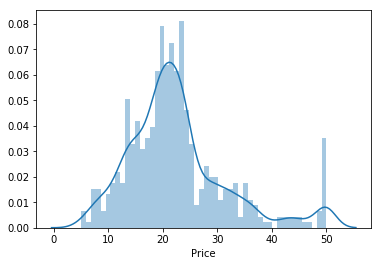

In [15]:
sns.distplot(boston_df['Price'], bins = 50)

The target follows an approximately normal distribtion, with a few very high median prices in certain areas.

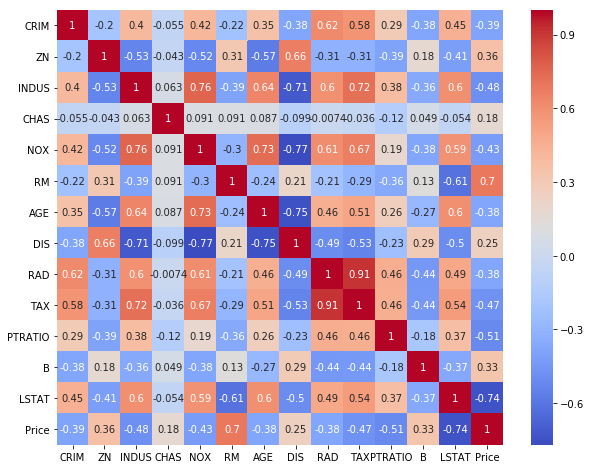

In [18]:
plt.figure(figsize = (10,8))
sns.heatmap(boston_df.corr(), annot = True, cmap = 'coolwarm')

The RAD and TAX variables are highly correlated. The LSTAT (% lower status of the population) and RM (average number of rooms) variables appear to be the main predictors of the median house price, with a negative and positive correlation, respectively.

# Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [23]:
X = boston_df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = boston_df["Price"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

# Multiple Linear Regression

Building a model with all independent variables.

Training the regressor:

In [26]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Checking the intercept and coefficients:

In [27]:
print(lm.intercept_)

40.26605123714444


In [29]:
coef_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coef_df

,Coefficient
CRIM,-0.087492
ZN,0.050279
INDUS,0.020679
CHAS,3.754576
NOX,-17.793385
RM,3.241187
AGE,0.012090
DIS,-1.409655
RAD,0.263477
TAX,-0.010338


Evaluating the model against the test set:

In [30]:
predictions = lm.predict(X_test)

Text(0.5,1,'Predictions vs Actual Values - Test Set')

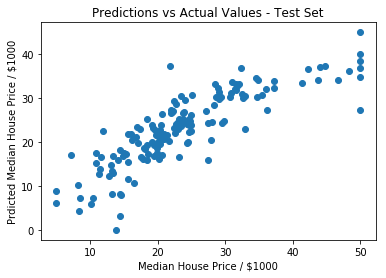

In [40]:
plt.scatter(y_test, predictions)
plt.xlabel("Median House Price / $1000")
plt.ylabel("Prdicted Median House Price / $1000")
plt.title("Predictions vs Actual Values - Test Set")

Text(0.5,1,'Distribution of error in the test set')

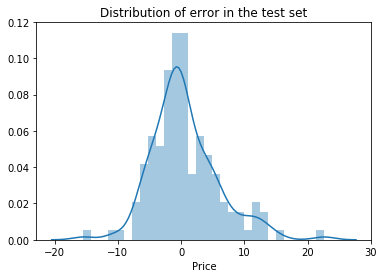

In [41]:
sns.distplot((y_test-predictions), bins = 30)
plt.title("Distribution of error in the test set")

In [34]:
from sklearn import metrics

In [35]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.836528137727915
MSE: 28.55114876566976
RMSE: 5.343327499383672


# Optimising the model via Backward Elimination

In [36]:
import statsmodels.formula.api as sm

Regressor with all features included:

In [59]:
regressor_OLS = sm.OLS(y, X).fit()

In [60]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     891.1
Date:                Fri, 18 May 2018   Prob (F-statistic):               0.00
Time:                        12:45:16   Log-Likelihood:                -1523.8
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     493   BIC:                             3129.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0916      0.034     -2.675      0.008      -0.159      -0.024
ZN             0.0487      0.014      3.379      0.001       0.020       0.077
INDUS         -0.0038      0.064     -0.059      0.953      -0.130       0.123
CHAS           2.8564      0.904      3.160      0.002       1.080       4.633
NOX           -2.8808      3.359     -0.858      0.392      -9.481       3.720
RM             5.9252      0.309     19.168      0.000       5.318       6.533
AGE           -0.0072      0.014     -0.523      0.601      -0.034       0.020
DIS           -0.9680      0.196     -4.947      0.000      -1.352      -0.584
RAD            0.1704      0.067      2.554      0.011       0.039       0.302
TAX           -0.0094      0.004     -2.393      0.017      -0.017      -0.002
PTRATIO       -0.3924      0.110     -3.571      0.000      -0.608      -0.177
B              0.0150      0.003      5.561      0.000       0.010       0.020
LSTAT         -0.4170      0.051     -8.214      0.000      -0.517      -0.317
==============================================================================
Omnibus:                      204.050   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1372.527
Skew:                           1.609   Prob(JB):                    9.11e-299
Kurtosis:                      10.399   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Many of the variables have associated p-values > 0.05, which suggests that the model could be improved by eliminating some of the independent variables.

In [66]:
def backward_elimination(x, y, sig_limit):
    num_vars = len(x.columns)
    for i in range(0, num_vars):
        regressor_OLS = sm.OLS(y, x).fit()
        max_var = max(regressor_OLS.pvalues)
        if max_var > sig_limit:
            for j in range(0, num_vars - i):
                if (regressor_OLS.pvalues[j] == max_var):
                    x = x.drop(x.columns[[j]], axis=1) 
    return x

In [68]:
optimised_features = backward_elimination(X, y, 0.05)
optimised_features.head()

,CRIM,ZN,CHAS,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,0.0,6.575,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,0.0,6.421,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,0.0,7.185,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,0.0,6.998,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,0.0,7.147,6.0622,3.0,222.0,18.7,396.90,5.33


Three features have been dropped from the model: INDUS (proportion of non-retail business acres per town), NOX (nitric oxides concentration) and AGE (proportion of owner-occupied units built prior to 1940).

Examining the optimised regressor model:

In [69]:
optimised_regressor = sm.OLS(y, optimised_features).fit()

In [70]:
optimised_regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     1162.
Date:                Fri, 18 May 2018   Prob (F-statistic):               0.00
Time:                        12:52:18   Log-Likelihood:                -1524.6
No. Observations:                 506   AIC:                             3069.
Df Residuals:                     496   BIC:                             3111.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0898      0.034     -2.630      0.009      -0.157      -0.023
ZN             0.0512      0.014      3.630      0.000       0.024       0.079
CHAS           2.7212      0.892      3.052      0.002       0.970       4.473
RM             5.7113      0.245     23.353      0.000       5.231       6.192
DIS           -0.8664      0.167     -5.185      0.000      -1.195      -0.538
RAD            0.1820      0.063      2.867      0.004       0.057       0.307
TAX           -0.0109      0.003     -3.292      0.001      -0.017      -0.004
PTRATIO       -0.4004      0.109     -3.682      0.000      -0.614      -0.187
B              0.0146      0.003      5.475      0.000       0.009       0.020
LSTAT         -0.4499      0.042    -10.596      0.000      -0.533      -0.366
==============================================================================
Omnibus:                      198.034   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1249.000
Skew:                           1.575   Prob(JB):                    6.07e-272
Kurtosis:                      10.022   Cond. No.                     2.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""